#  Polynomial fitting using tensorflow

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

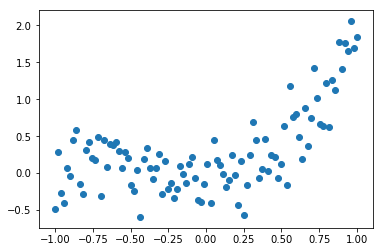

In [19]:
x_dataset = np.linspace(-1,1,100)
num_coeffs = 18
y_dataset_params = [0.] * num_coeffs
y_dataset_params[2] = 1
y_dataset_params[3] = 1
y_dataset = 0
for i in range(num_coeffs):
    y_dataset += y_dataset_params[i] * np.power(x_dataset, i)
y_dataset += np.random.randn(*x_dataset.shape) * 0.3

plt.scatter(x_dataset, y_dataset)
plt.show()

## Splitting into training and test sets

In [20]:
def split_dataset(x_dataset, y_dataset, ratio):
    arr = np.arange(x_dataset.size)
    np.random.shuffle(arr)
    num_train = int(ratio * x_dataset.size)
    x_train = x_dataset[arr[0:num_train]]
    y_train = y_dataset[arr[0:num_train]]
    x_test = x_dataset[arr[num_train:]]
    y_test = y_dataset[arr[num_train:]]
    
    return x_train, x_test, y_train, y_test

(x_train, x_test, y_train, y_test) = split_dataset(x_dataset, y_dataset, 0.7)

## tensorflow model

('reg lambda', 0.0)
('final cost', 0.028375557)


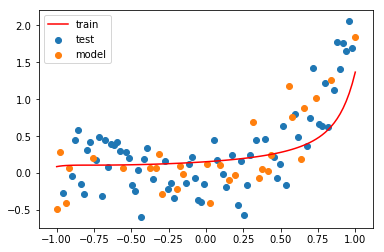

('reg lambda', 0.1111111111111111)
('final cost', 0.022685023)


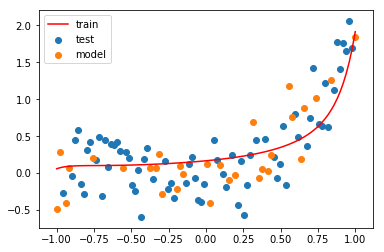

('reg lambda', 0.22222222222222221)
('final cost', 0.021686142)


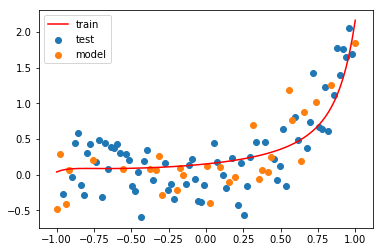

('reg lambda', 0.33333333333333331)
('final cost', 0.021584781)


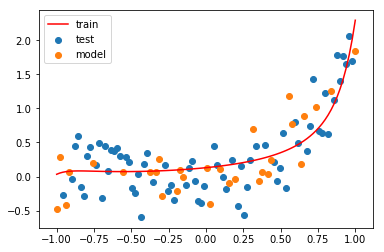

('reg lambda', 0.44444444444444442)
('final cost', 0.021713048)


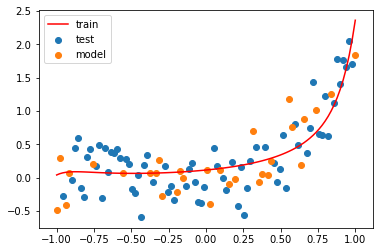

('reg lambda', 0.55555555555555558)
('final cost', 0.021881936)


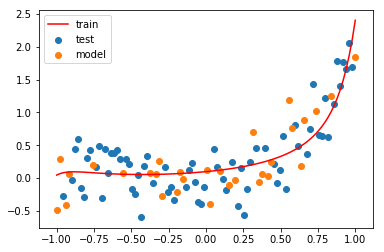

('reg lambda', 0.66666666666666663)
('final cost', 0.022022121)


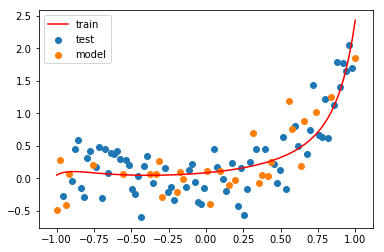

('reg lambda', 0.77777777777777768)
('final cost', 0.022108208)


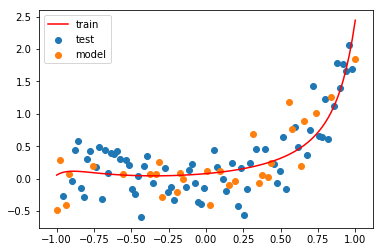

('reg lambda', 0.88888888888888884)
('final cost', 0.022134809)


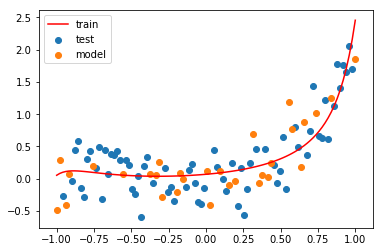

('reg lambda', 1.0)
('final cost', 0.022106018)


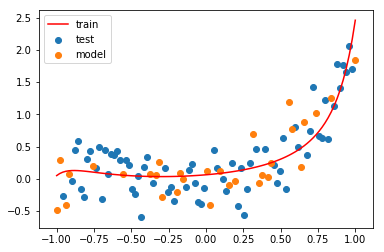

In [26]:
learning_rate = 0.001
training_epochs = 1000
reg_lambda = 0.


X = tf.placeholder('float')
Y = tf.placeholder('float')
w = tf.Variable([0.] * num_coeffs, name='parameters')

def model(X, w):
    terms = []
    for i in range(num_coeffs):
        term = tf.multiply(w[i], tf.pow(X, i))
        terms.append(term)
    return tf.add_n(terms)

y_model = model(X, w)
cost = tf.div(
            tf.add(
                tf.reduce_sum(tf.square(Y - y_model)), 
                tf.multiply(reg_lambda, tf.reduce_sum(tf.square(w)))), 
                2*x_train.size)

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for reg_lambda in np.linspace(0,1,10):
    for epoch in range(training_epochs):
        sess.run(train_op, feed_dict={X: x_train, Y: y_train})
    final_cost = sess.run(cost, feed_dict={X: x_test, Y: y_test})
    print('reg lambda', reg_lambda)
    print('final cost', final_cost)
    
    w_val = sess.run(w)
    plt.scatter(x_train, y_train, label='train')
    plt.scatter(x_test, y_test, label='test')
    y_predicted = 0
    for i in range(num_coeffs):
        y_predicted += w_val[i] * np.power(x_dataset, i)
    plt.plot(x_dataset, y_predicted, 'r', label='model')
    plt.legend(['train', 'test', 'model'])
    plt.show()
    
sess.close()

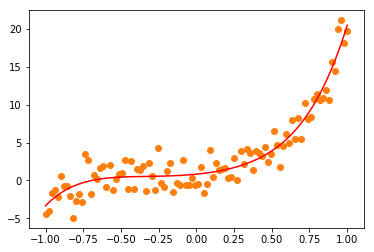

In [8]:
learning_rate = 0.01
training_epochs = 40

X = tf.placeholder('float')
Y = tf.placeholder('float')

def model(X,w):
    terms = []
    for i in range(num_coeffs):
        term = tf.multiply(w[i], tf.pow(X,i))
        terms.append(term)
    return tf.add_n(terms)

w = tf.Variable([0.]*num_coeffs, name="paramters")
y_model = model(X, w)

cost = (tf.pow(Y-y_model, 2))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs):
    for (x,y) in zip(trX, trY):
        sess.run(train_op, feed_dict={X:x, Y:y})
        
w_val = sess.run(w)
sess.close()

plt.scatter(trX, trY)
trY2 = 0
for i in range(num_coeffs):
    trY2 += w_val[i] * np.power(trX, i)
plt.plot(trX, trY2, 'r')
plt.show()